# **1. Install and import libraries**

In [8]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

# **2. Input or define a sample sentence**

In [9]:
sentence = "The quick brown fox jumps over the lazy dog."

# **3. Tokenize the sentence into words**

In [10]:
tokens = nltk.word_tokenize(sentence)

# **4. Apply POS tagging**

In [11]:
pos_tags = nltk.pos_tag(tokens)

# **5. Display the results**

In [12]:
for word, tag in pos_tags:
    print(f"{word} → {tag}")

The → DT
quick → JJ
brown → NN
fox → NN
jumps → VBZ
over → IN
the → DT
lazy → JJ
dog → NN
. → .


# **6. Visualize the tagged structure**

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
from nltk import ne_chunk
from nltk.tree import Tree

In [18]:
tree = ne_chunk(pos_tags)
print(tree)

(S
  The/DT
  quick/JJ
  brown/NN
  fox/NN
  jumps/VBZ
  over/IN
  the/DT
  lazy/JJ
  dog/NN
  ./.)


In [21]:
entities = []
for subtree in tree:
    if isinstance(subtree, Tree):
        entity_text = " ".join([token for token, pos in subtree.leaves()])
        entities.append((entity_text, subtree.label()))
    else:
        token, tag = subtree
        entities.append((token, tag))

In [20]:
import matplotlib.pyplot as plt


In [22]:
words, labels = zip(*entities)

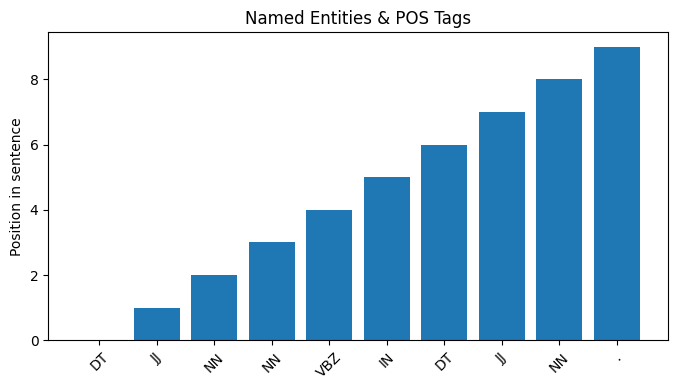

In [23]:
plt.figure(figsize=(8, 4))
plt.bar(words, range(len(words)), tick_label=labels)
plt.xticks(rotation=45)
plt.ylabel("Position in sentence")
plt.title("Named Entities & POS Tags")
plt.show()